<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_04_Cat_vs_Dog_Image_Classification/Project_04_Cat_vs_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cat Vs Dog Image Classification Project | Deep Learning Project | CNN Project**

In [4]:
# Create a directory for Kaggle and copy the API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the dogs vs cats dataset from Kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 298MB/s]
100% 1.06G/1.06G [00:08<00:00, 129MB/s]


In [6]:
# Extract the downloaded dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
# Import necessary libraries for building the CNN model
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# Create data generators for training and validation datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize the image data by scaling pixel values to the range [0, 1]
# This helps in faster convergence during training
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# Create the Convolutional Neural Network (CNN) model
model = Sequential()

# Add Convolutional layers with Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Flatten the output from convolutional layers
model.add(Flatten())

# Add Dense (fully connected) layers with Dropout for regularization
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid')) # Output layer with sigmoid activation for binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Display the model summary, showing the layers and parameter counts
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
# Train the model using the training dataset and validate with the validation dataset
# Check for GPU availability
if tf.config.list_physical_devices('GPU'):
    print("GPU is available. Training on GPU.")
else:
    print("No GPU available. Training on CPU.")

history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 83ms/step - accuracy: 0.5594 - loss: 2.8430 - val_accuracy: 0.6820 - val_loss: 0.6000
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.6858 - loss: 0.5921 - val_accuracy: 0.7248 - val_loss: 0.5249
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.7508 - loss: 0.5087 - val_accuracy: 0.7656 - val_loss: 0.4700
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8029 - loss: 0.4318 - val_accuracy: 0.7604 - val_loss: 0.5041
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.8324 - loss: 0.3824 - val_accuracy: 0.7684 - val_loss: 0.4926
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.8674 - loss: 0.3111 - val_accuracy: 0.7732 - val_loss: 0.5378
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8894 - loss: 0.2627 - val_accuracy: 0.7670 - val_loss: 0.5924
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9359 - loss: 0.1696 - 

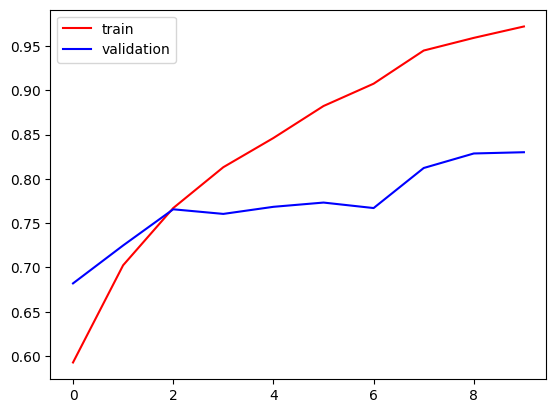

In [14]:
# Plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

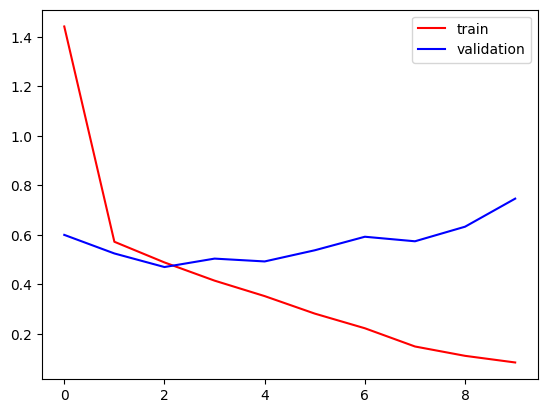

In [15]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
# Comments on ways to reduce overfitting in deep learning models
# Add more data
# Data Augmentation
# L1//L2 Regularization
# Dropout
# Batch Normalization
# Reduce Complexity

In [17]:
# Import the OpenCV library for image processing
import cv2

In [22]:
# Load a test image using OpenCV
test_img = cv2.imread('/content/cat.jpg')

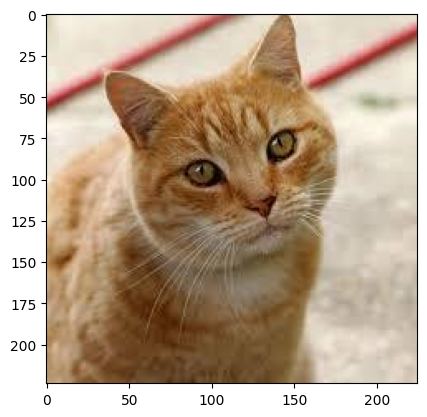

In [23]:
# Display the test image using matplotlib
# Convert BGR image to RGB for correct display in matplotlib
# Check if the image was loaded successfully before displaying
if test_img is not None:
  plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
  plt.show()
else:
  print("Error: Image not loaded. Please check the file path.")

In [24]:
# Print the shape of the loaded image (height, width, channels)
test_img.shape

(224, 225, 3)

In [25]:
# Resize the test image to match the input size of the model (256x256)
test_img = cv2.resize(test_img,(256,256))

In [26]:
# Reshape the image to add a batch dimension (1, height, width, channels)
# This is required as the model expects input in batches
test_input =test_img.reshape((1,256,256,3))

In [27]:
# Use the trained model to predict the class of the test image
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)